# Mean photon arrival times

In [1]:
# Import all required libraries
import tttrlib
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Loading the data and filling the CLSM container

In [2]:
# First, read the TTTR data and define used channels
filename_data = './FLIM/mGBP_DA.ht3'
tttr_data = tttrlib.TTTR(filename_data, 'HT3')

# Instrument Response funtion is required to correct the mean arrival times
filename_irf = './FLIM/mGBP_IRF.ht3'
irf = tttrlib.TTTR(filename_irf)

# Detector pairs (Seidel pairs)
green_ch = [0, 1]

# Pulsed interleaved excitation: 
# For green channels select only the prompt time window (defined by the known repetition rate and the microtime binning)
prompt_range = 0, 11000
tttr_green = tttr_data.get_tttr_by_channel(green_ch)
clsm_green = tttrlib.CLSMImage(tttr_data=tttr_data, channels=green_ch, micro_time_ranges=[prompt_range])


# Create a mask for the IRF 
# Select photons in certain channels and in the prompt micro time range
mask_irf_green_prompt = tttrlib.TTTRMask()
mask_irf_green_prompt.select_channels(irf, green_ch)
mask_irf_green_prompt.select_microtime_ranges(irf, [prompt_range])
tttr_irf_green_prompt = irf[mask_irf_green_prompt.indices]

## Mean arrival times

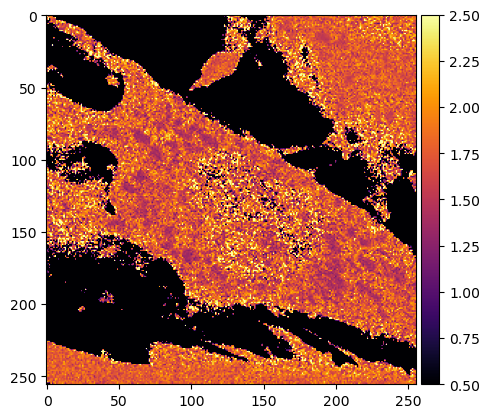

In [6]:
# Here, we stack the frames and only process pixel with at least 20 photons in sum
mean_tau_green = clsm_green.get_mean_lifetime(
    tttr_data,
    minimum_number_of_photons=20,
    stack_frames=True,
    tttr_irf=tttr_irf_green_prompt
)

# Plot the results
ax = plt.subplot()
im = ax.imshow(mean_tau_green[0], cmap='inferno', vmax=2.5, vmin=0.5)

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [7]:
# Save image as tiff file (w/o colorbar)
ski.io.imsave(filename_data + '_mean tau green.tif', mean_tau_green[0])